# TODO:
- Create model and layers
- Review the differences in layers (mostly looking at the first numerical argument in the layer creation)
- Use a subset of the train/test data to create MVP

In [1]:
import sklearn as sk
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img
import matplotlib.pyplot as plt
import os
import datetime
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## Setup constants
IMAGE_SHAPE=(128, 128, 3)

DATA_DIR = '../data'
DATA_FABRICATED_DIR = os.path.join(DATA_DIR, 'fabricated')

#IMAGE_TEST_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_test')
IMAGE_TEST_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_test')
#IMAGE_VALIDATION_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_validation')
IMAGE_VALIDATION_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_validation')
#IMAGE_TRAIN_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_train')
IMAGE_TRAIN_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_train')

SAVED_MODEL_DIR = os.path.join(DATA_DIR, 'models')

In [3]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=[IMAGE_SHAPE[0], IMAGE_SHAPE[1], IMAGE_SHAPE[2]]))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  #optimizer='rmsprop',
                  metrics=['acc'])
    return model

create_model()

In [4]:
def create_data_generator():
    # All images will be rescaled by 1./255
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)
    validation_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            # This is the target directory
            IMAGE_TRAIN_DIR,
            target_size=[IMAGE_SHAPE[0], IMAGE_SHAPE[1]],
            batch_size=20,
            # Since we use binary_crossentropy loss, we need binary labels
            class_mode='binary')

    validation_generator = validation_datagen.flow_from_directory(
            IMAGE_VALIDATION_DIR,
            target_size=[IMAGE_SHAPE[0], IMAGE_SHAPE[1]],
            batch_size=20,
            class_mode='binary')
    
    return [train_generator, validation_generator]

create_data_generator()

Found 1335 images belonging to 2 classes.
Found 175 images belonging to 2 classes.


In [5]:
model = create_model()
train_generator, validation_generator = create_data_generator()

history = model.fit_generator(
      train_generator,
      epochs=220,
      validation_data=validation_generator
)

Found 1335 images belonging to 2 classes.
Found 175 images belonging to 2 classes.
Epoch 1/220
67/67 [==============================] - 41s 610ms/step - loss: 0.6114 - acc: 0.6664 - val_loss: 1.2085 - val_acc: 0.2857
Epoch 2/220
67/67 [==============================] - 39s 582ms/step - loss: 0.5445 - acc: 0.7408 - val_loss: 1.1633 - val_acc: 0.2971
Epoch 3/220
67/67 [==============================] - 39s 587ms/step - loss: 0.5245 - acc: 0.7398 - val_loss: 1.2350 - val_acc: 0.2914
Epoch 4/220
67/67 [==============================] - 39s 583ms/step - loss: 0.5114 - acc: 0.7599 - val_loss: 1.0073 - val_acc: 0.3657
Epoch 5/220
67/67 [==============================] - 39s 582ms/step - loss: 0.5026 - acc: 0.7572 - val_loss: 1.0247 - val_acc: 0.4057
Epoch 6/220
67/67 [==============================] - 39s 585ms/step - loss: 0.5060 - acc: 0.7582 - val_loss: 0.9622 - val_acc: 0.3314
Epoch 7/220
67/67 [==============================] - 41s 605ms/step - loss: 0.4878 - acc: 0.7617 - val_loss: 1.05

67/67 [==============================] - 38s 568ms/step - loss: 0.2137 - acc: 0.9192 - val_loss: 0.3689 - val_acc: 0.8571
Epoch 62/220
67/67 [==============================] - 38s 561ms/step - loss: 0.2071 - acc: 0.9082 - val_loss: 0.1802 - val_acc: 0.9200
Epoch 63/220
67/67 [==============================] - 39s 580ms/step - loss: 0.2100 - acc: 0.9127 - val_loss: 0.2241 - val_acc: 0.9200
Epoch 64/220
67/67 [==============================] - 38s 570ms/step - loss: 0.2221 - acc: 0.9112 - val_loss: 0.1981 - val_acc: 0.9200
Epoch 65/220
67/67 [==============================] - 39s 589ms/step - loss: 0.2100 - acc: 0.9164 - val_loss: 0.2942 - val_acc: 0.8800
Epoch 66/220
67/67 [==============================] - 38s 568ms/step - loss: 0.2075 - acc: 0.9102 - val_loss: 0.3573 - val_acc: 0.8743
Epoch 67/220
67/67 [==============================] - 38s 560ms/step - loss: 0.1946 - acc: 0.9122 - val_loss: 0.1893 - val_acc: 0.9314
Epoch 68/220
67/67 [==============================] - 38s 564ms/step

67/67 [==============================] - 39s 576ms/step - loss: 0.1626 - acc: 0.9266 - val_loss: 0.2388 - val_acc: 0.9257
Epoch 122/220
67/67 [==============================] - 39s 577ms/step - loss: 0.1543 - acc: 0.9358 - val_loss: 0.2353 - val_acc: 0.9200
Epoch 123/220
67/67 [==============================] - 38s 572ms/step - loss: 0.1423 - acc: 0.9378 - val_loss: 0.1889 - val_acc: 0.9371
Epoch 124/220
67/67 [==============================] - 39s 576ms/step - loss: 0.1493 - acc: 0.9383 - val_loss: 0.2745 - val_acc: 0.9314
Epoch 125/220
67/67 [==============================] - 39s 587ms/step - loss: 0.1389 - acc: 0.9460 - val_loss: 0.3884 - val_acc: 0.8971
Epoch 126/220
67/67 [==============================] - 39s 578ms/step - loss: 0.1582 - acc: 0.9296 - val_loss: 0.2801 - val_acc: 0.9200
Epoch 127/220
67/67 [==============================] - 38s 575ms/step - loss: 0.1530 - acc: 0.9348 - val_loss: 0.5246 - val_acc: 0.8229
Epoch 128/220
67/67 [==============================] - 39s 588

67/67 [==============================] - 37s 556ms/step - loss: 0.1108 - acc: 0.9530 - val_loss: 0.4146 - val_acc: 0.8971
Epoch 182/220
67/67 [==============================] - 38s 575ms/step - loss: 0.1286 - acc: 0.9478 - val_loss: 0.4164 - val_acc: 0.9029
Epoch 183/220
67/67 [==============================] - 45s 666ms/step - loss: 0.1356 - acc: 0.9515 - val_loss: 0.3893 - val_acc: 0.8914
Epoch 184/220
67/67 [==============================] - 42s 630ms/step - loss: 0.1239 - acc: 0.9483 - val_loss: 0.6427 - val_acc: 0.8629
Epoch 185/220
67/67 [==============================] - 46s 683ms/step - loss: 0.1166 - acc: 0.9522 - val_loss: 0.3272 - val_acc: 0.9314
Epoch 186/220
67/67 [==============================] - 43s 639ms/step - loss: 0.1250 - acc: 0.9463 - val_loss: 0.6625 - val_acc: 0.8629
Epoch 187/220
67/67 [==============================] - 45s 671ms/step - loss: 0.1278 - acc: 0.9463 - val_loss: 0.3711 - val_acc: 0.9029
Epoch 188/220
67/67 [==============================] - 42s 630

In [6]:
train_generator, validation_generator = create_data_generator()
def show_images_for_generator(generator):
    cnt = 0
    batch = next(generator)
    print(batch[1])
    #print(batch[0][0])
    for img in batch[0]:
        cnt += 1
        plt.figure(cnt)

        imgplot = plt.imshow(array_to_img(img))
        if cnt == 5:
            break

Found 1335 images belonging to 2 classes.
Found 175 images belonging to 2 classes.


[1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.]


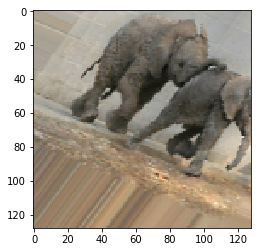

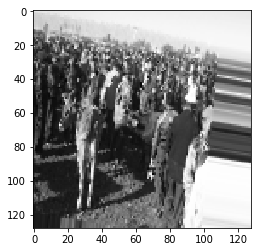

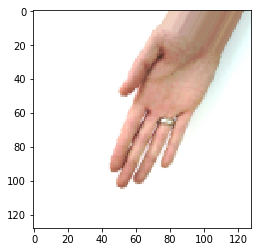

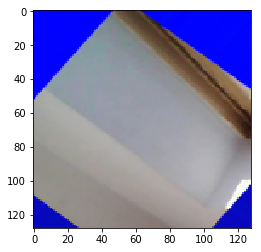

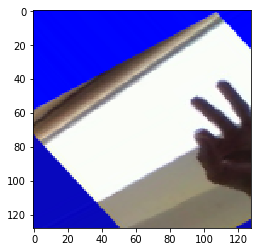

In [7]:
show_images_for_generator(train_generator)

In [8]:
# show_images_for_generator(validation_generator)

## Test Model

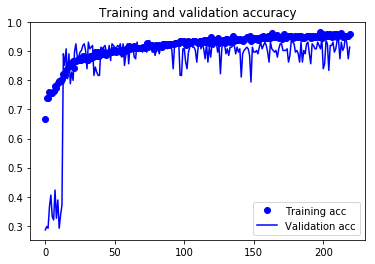

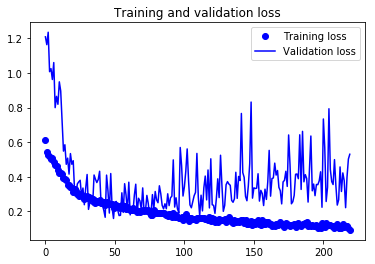

In [9]:
def desplay_trajectory(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
desplay_trajectory(history)

### Test model using unseen images

In [10]:

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        IMAGE_TEST_DIR,
        target_size=(IMAGE_SHAPE[0], IMAGE_SHAPE[1]),
        batch_size=82,
        class_mode='binary')

Found 118 images belonging to 2 classes.


In [11]:
batch = next(test_generator)
images = batch[0]
classes = batch[1]
predictions = model.predict(images)

In [12]:
image_map = {}
i = 0
for image in images:
    image_map[i] = image
    i += 1

In [13]:
test_image_results = pd.DataFrame({
    'images': list(image_map.keys()),
    'prediction': predictions.flatten(),
    'classes': classes
}) \
.sort_values('prediction', ascending=False)

test_image_results

classes  images    prediction
52      1.0      52  1.000000e+00
46      1.0      46  1.000000e+00
22      1.0      22  1.000000e+00
31      1.0      31  9.999999e-01
0       1.0       0  9.999981e-01
40      1.0      40  9.999970e-01
78      1.0      78  9.999954e-01
25      1.0      25  9.999940e-01
7       1.0       7  9.999663e-01
13      1.0      13  9.999248e-01
18      1.0      18  9.998535e-01
44      1.0      44  9.998500e-01
29      1.0      29  9.996520e-01
41      1.0      41  9.996315e-01
39      1.0      39  9.996222e-01
60      1.0      60  9.996144e-01
20      1.0      20  9.996108e-01
81      1.0      81  9.996092e-01
68      1.0      68  9.995623e-01
73      1.0      73  9.995050e-01
67      1.0      67  9.994640e-01
58      1.0      58  9.994023e-01
23      1.0      23  9.990489e-01
37      1.0      37  9.983537e-01
54      1.0      54  9.976338e-01
64      1.0      64  9.975390e-01
2       1.0       2  9.965682e-01
12      1.0      12  9.964743e-01
59      1.0      59  9.963667e-01
80      1.0      80  9.956238e-01
..      ...     ...           ...
63      0.0      63  6.010679e-07
15      0.0      15  1.506866e-08
14      0.0      14  7.914014e-09
57      0.0      57  7.449063e-09
10      0.0      10  7.117986e-09
50      0.0      50  2.770850e-10
8       0.0       8  2.095293e-10
36      0.0      36  5.664738e-11
28      0.0      28  4.636662e-11
32      0.0      32  2.917938e-11
69      0.0      69  1.527915e-12
51      0.0      51  1.464552e-12
16      0.0      16  5.241500e-13
19      0.0      19  4.777887e-13
75      0.0      75  4.418477e-13
48      0.0      48  2.061543e-13
79      0.0      79  1.827272e-13
34      0.0      34  1.461404e-13
56      0.0      56  5.065014e-14
21      0.0      21  1.097544e-14
47      0.0      47  4.285603e-15
24      0.0      24  3.852890e-15
5       0.0       5  1.667800e-15
11      0.0      11  4.787960e-16
4       0.0       4  2.297998e-16
3       0.0       3  1.685322e-16
38      0.0      38  6.379944e-18
33      0.0      33  1.809941e-18
61      0.0      61  5.293113e-19
77      0.0      77  3.069896e-21

[82 rows x 3 columns]

In [14]:

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [15]:
# fnames = [os.path.join(IMAGE_TEST_DIR, fname) for fname in test_image_results.filename]

#imgs = [load_img(fname, target_size=(100,100)) for fname in fnames]
imgs = [array_to_img(image_map[img]) for img in test_image_results.images]
show_images(imgs, 5, test_image_results.prediction)

## Save Model

In [16]:
def ensure_model_directory_exists():
    try:
        os.mkdir(SAVED_MODEL_DIR)
    except:
        print('Tried to create "{}" but it already exists'.format(SAVED_MODEL_DIR))

def save_model():
    ensure_model_directory_exists()
    
    evaluate_model_with_test_data = model.evaluate_generator(test_generator)

    accuracy_of_model = evaluate_model_with_test_data[-1]
    timestamp_raw = str(datetime.datetime.now())
    timestamp_without_milliseconds = timestamp_raw.split('.')[0]
    
    model_filename = '{}___{}.h5'.format(timestamp_without_milliseconds, accuracy_of_model)
    model_filepath = os.path.join(SAVED_MODEL_DIR, model_filename)
    
    print('saving file {}'.format(model_filepath))

    model.save(model_filepath)
save_model()

Tried to create "../data/models" but it already exists
saving file ../data/models/2018-10-09 20:54:49___0.940677957009461.h5
